# China cyber: An analysis of cyberthreats in China

Data for this analysis is from [CNCERT](https://www.cert.org.cn) (in Chinese) from the beginning of 2018 to mid-August 2019. The data was compiled from weekly reports released by the organization. It contains metrics covering the number of new threats, hacked websites, phishing websites, number of infected computers, etc. 

Import requred packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Specify size of plots

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Import dataset

In [3]:
df_cyber = pd.read_csv('china_cyber2.csv', parse_dates=True, index_col='Date')

Get summary of the dataframe

In [4]:
df_cyber.head()

,status,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
Date,,,,,,,,,
2018-01-07,Good,0.201,2210.0,44.0,827,38,407.0,219.0,63.0
2018-01-14,Good,0.202,2117.0,44.0,773,32,419.0,257.0,109.0
2018-01-21,Good,0.239,2435.0,42.0,908,37,333.0,410.0,128.0
2018-01-28,Good,0.252,867.0,0.0,812,17,384.0,241.0,109.0
2018-02-04,Good,0.211,1992.0,30.0,758,14,318.0,382.0,101.0


In [5]:
df_cyber.tail()

,status,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
Date,,,,,,,,,
2019-07-21,Fair,0.210,5135.0,5.0,3462,46,542.0,417.0,138.0
2019-07-28,Fair,0.210,NaN,NaN,4085,44,496.0,443.0,198.0
2019-08-04,Good,0.220,NaN,NaN,3433,54,498.0,308.0,82.0
2019-08-11,Fair,0.216,NaN,NaN,3124,28,379.0,400.0,62.0
2019-08-18,Fair,0.230,NaN,NaN,3385,24,117.0,498.0,167.0


In [6]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2018-01-07 to 2019-08-18
Data columns (total 9 columns):
status                 85 non-null object
infected_computers     84 non-null float64
defaced_websites       78 non-null float64
defaced_gov            77 non-null float64
backdoor_websites      85 non-null int64
backdoor_gov           85 non-null int64
phishing_webites       84 non-null float64
new_vulnerabilities    81 non-null float64
high_risk              81 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 6.6+ KB


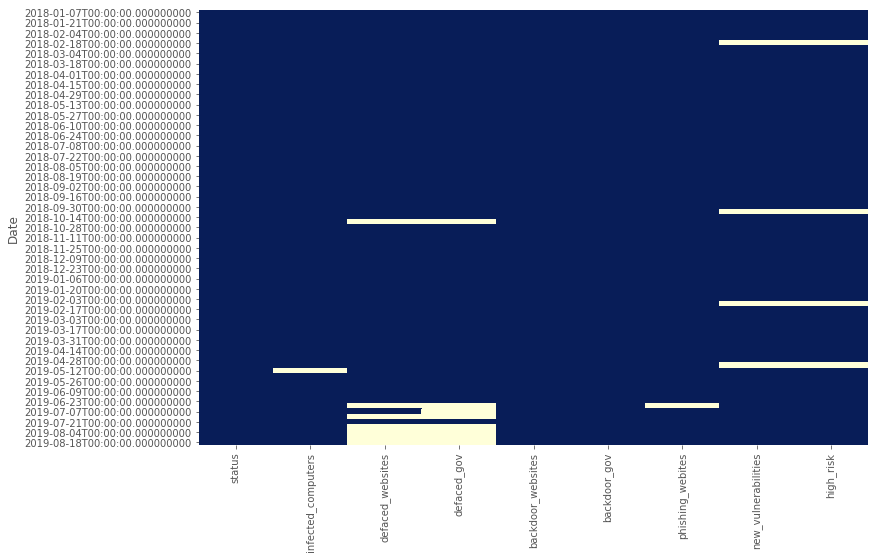

In [7]:
_ = sns.heatmap(df_cyber.isnull(), cmap="YlGnBu_r", cbar=False)

Convert 'status' column to categorical data

In [7]:
df_cyber['status'].astype('category').head()

Date
2018-01-07    Good
2018-01-14    Good
2018-01-21    Good
2018-01-28    Good
2018-02-04    Good
Name: status, dtype: category
Categories (3, object): [Excellent, Fair, Good]

Plot counts of weekly status for the whole dataset

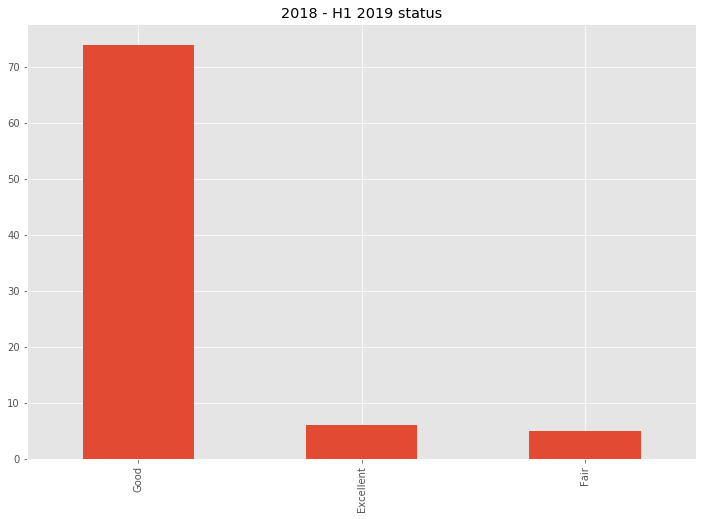

In [8]:
_ = df_cyber['status'].value_counts().plot(kind='bar')
_ = plt.title('2018 - H1 2019 status')

Plot colors to various statuses for possible use later

In [9]:
df_cyber['status_color'] = df_cyber.status.map({'Good': 'blue', 'Fair': 'orange', 'Excellent': 'green'})

Fill missing values with means

In [10]:
df_cyber.fillna(df_cyber.mean(), inplace=True)

Plot important values

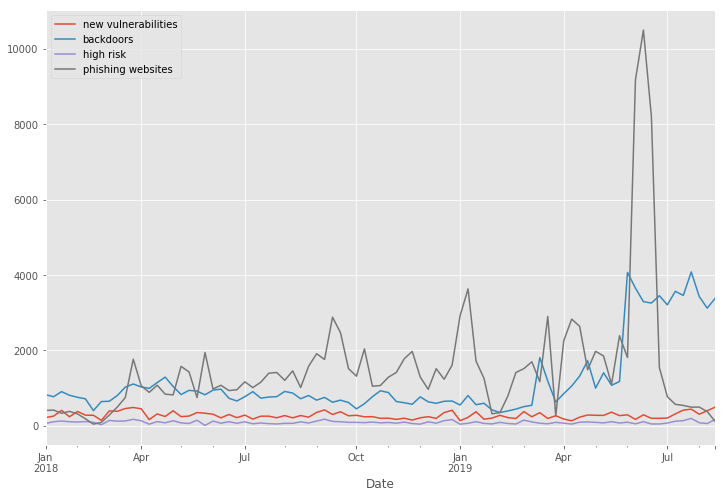

In [11]:
ax = df_cyber['new_vulnerabilities'].plot(label='new vulnerabilities')
_ = df_cyber['backdoor_websites'].plot(ax=ax, label='backdoors')
_ = df_cyber['high_risk'].plot(ax=ax, label='high risk')
_ = df_cyber['phishing_webites'].plot(ax=ax, label='phishing websites')
_ = plt.legend()

Create function for plotting columns 

In [12]:
def plot_metric(column, kind):
    df_cyber[column].plot(kind=kind)
    plt.title(str(column))

In [13]:
df_cyber.columns

Index(['status', 'infected_computers', 'defaced_websites', 'defaced_gov',
       'backdoor_websites', 'backdoor_gov', 'phishing_webites',
       'new_vulnerabilities', 'high_risk', 'status_color'],
      dtype='object')

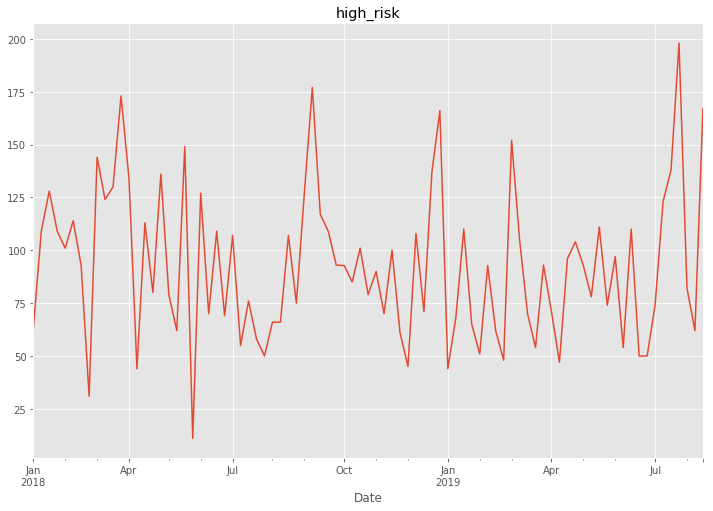

In [14]:
plot_metric('high_risk', 'line')

Create a plot to show correlation between various columns in the dataset

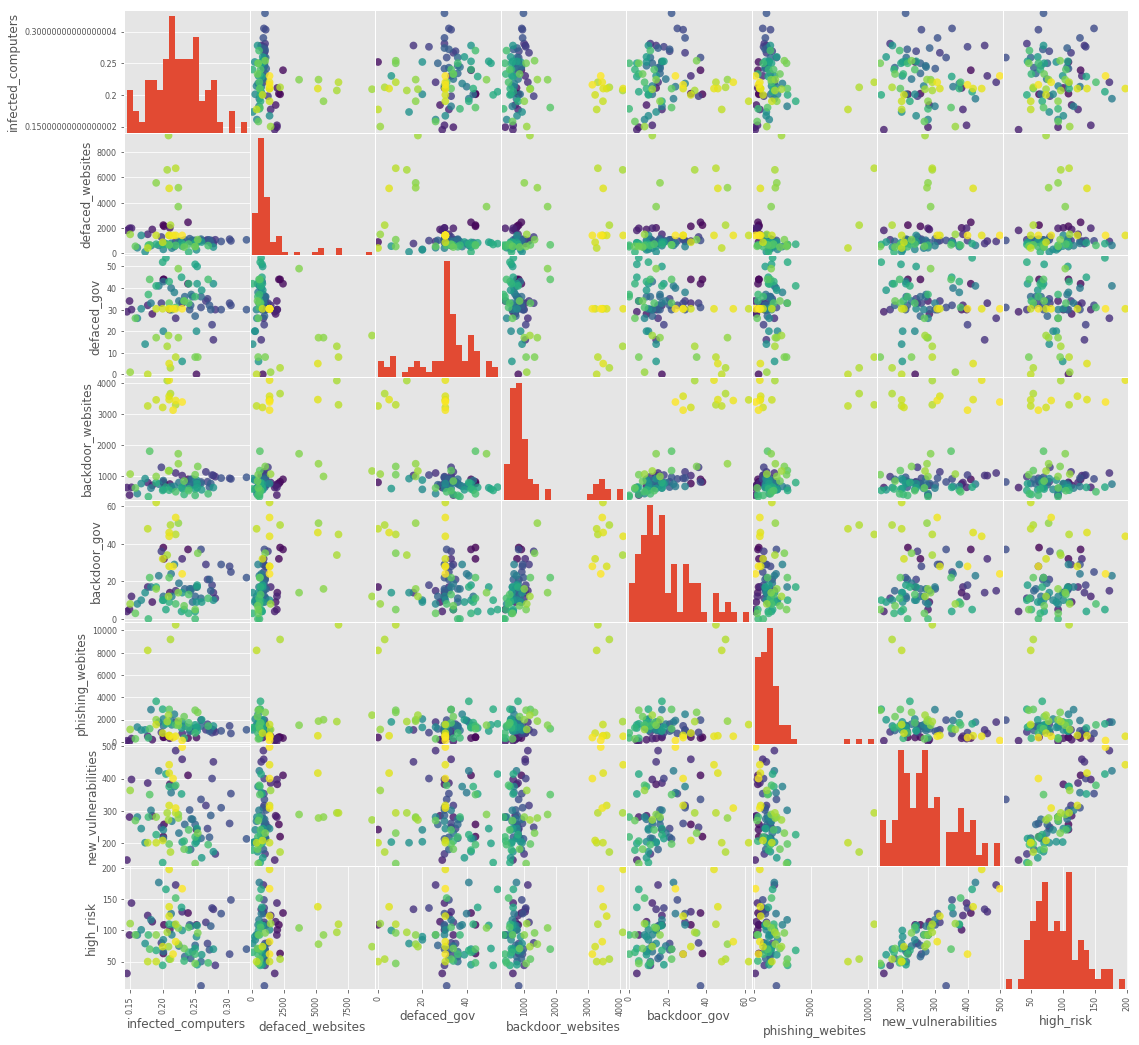

In [15]:
cyber = pd.plotting.scatter_matrix(df_cyber,figsize=(18,18), c=df_cyber.index, marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

In [16]:
corr = df_cyber.corr()

In [17]:
corr[corr > 0.6]

,infected_computers,defaced_websites,defaced_gov,backdoor_websites,backdoor_gov,phishing_webites,new_vulnerabilities,high_risk
infected_computers,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defaced_websites,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
defaced_gov,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
backdoor_websites,NaN,NaN,NaN,1.000000,0.714984,NaN,NaN,NaN
backdoor_gov,NaN,NaN,NaN,0.714984,1.000000,NaN,NaN,NaN
phishing_webites,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
new_vulnerabilities,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.796353
high_risk,NaN,NaN,NaN,NaN,NaN,NaN,0.796353,1.000000


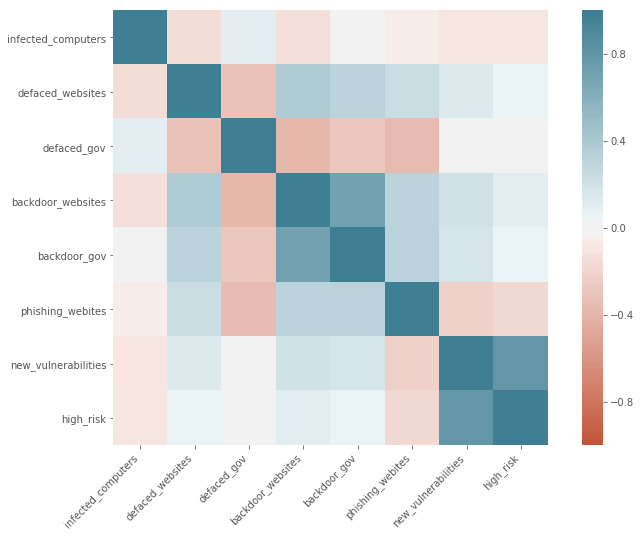

In [18]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
_ = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

Explore data with positive correlations

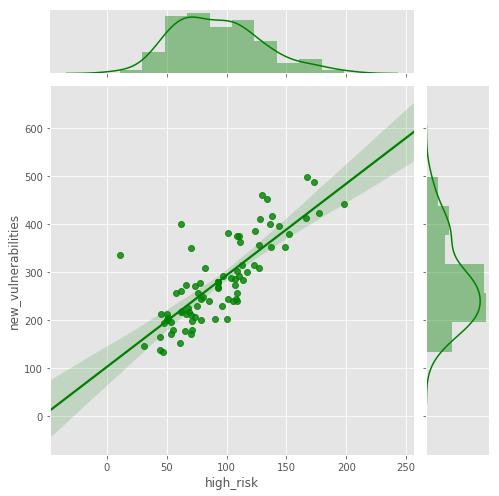

In [19]:
g = sns.jointplot("high_risk", "new_vulnerabilities", data=df_cyber, kind="reg", color="g", height=7)

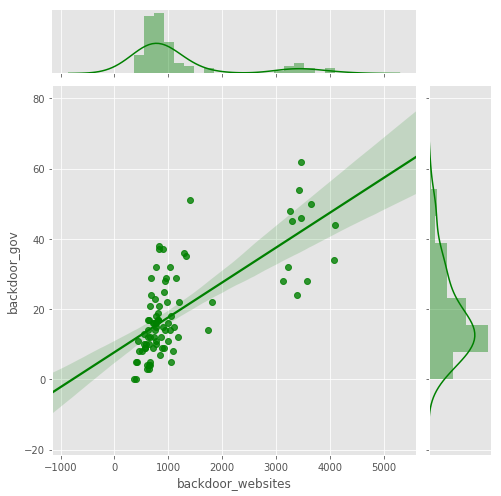

In [20]:
g2 = sns.jointplot("backdoor_websites", "backdoor_gov", data=df_cyber, kind="reg", color="g", height=7)

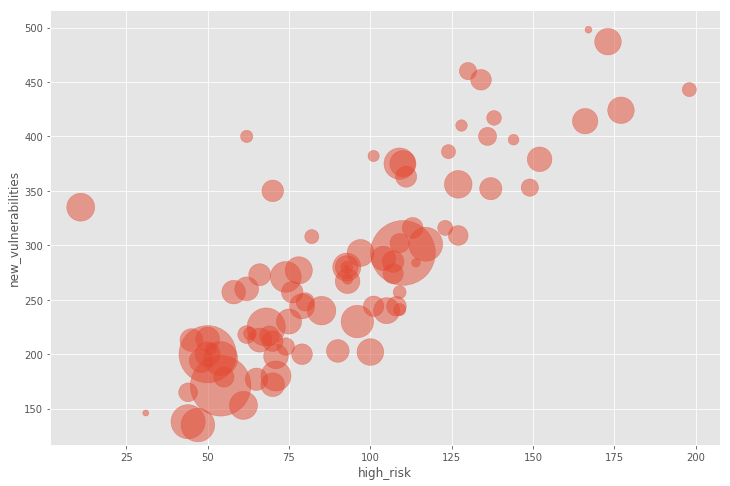

In [21]:
scatter = plt.scatter(df_cyber['high_risk'], df_cyber['new_vulnerabilities'], s=df_cyber['phishing_webites'] / 2.5, alpha =0.5)
_ = plt.xlabel("high_risk")
_ = plt.ylabel("new_vulnerabilities")

### Making predictions on data

In [22]:
status = df_cyber[['status']]

In [23]:
risks = df_cyber[['new_vulnerabilities', 'high_risk']]

In [24]:
risks_array = risks.values

In [25]:
status_array = status.values

In [40]:
status.loc[:,'mapped'] = status.status.map({'Fair': 0, 'Good': 1, "Excellent": 2})

In [39]:
mapped = status['mapped']

In [28]:
mapped_array = mapped.values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(risks_array, mapped_array, random_state = 0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
pred = knn.predict(X_test)

In [34]:
round(np.mean(y_test == pred) * 100, 2)

95.45

In [35]:
round(knn.score(X_test, y_test) * 100, 2)

95.45

In [36]:
training_accuracy = []
test_accuracy= []


neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

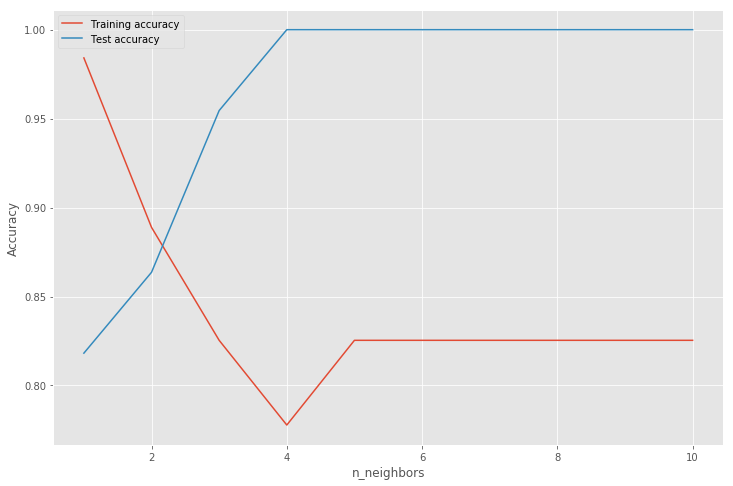

In [37]:
# Plot the results
_ = plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
_ = plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
_ = plt.ylabel("Accuracy")
_ = plt.xlabel("n_neighbors")
_ = plt.legend()